<a href="https://colab.research.google.com/github/raffiilham/PVCK_Genap_2021/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

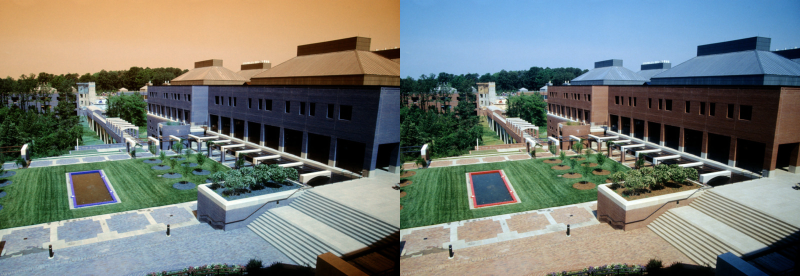

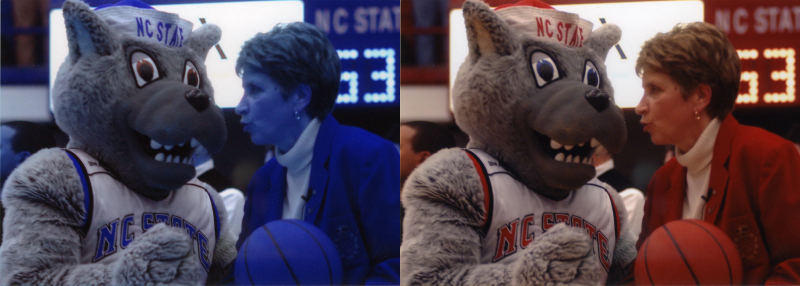

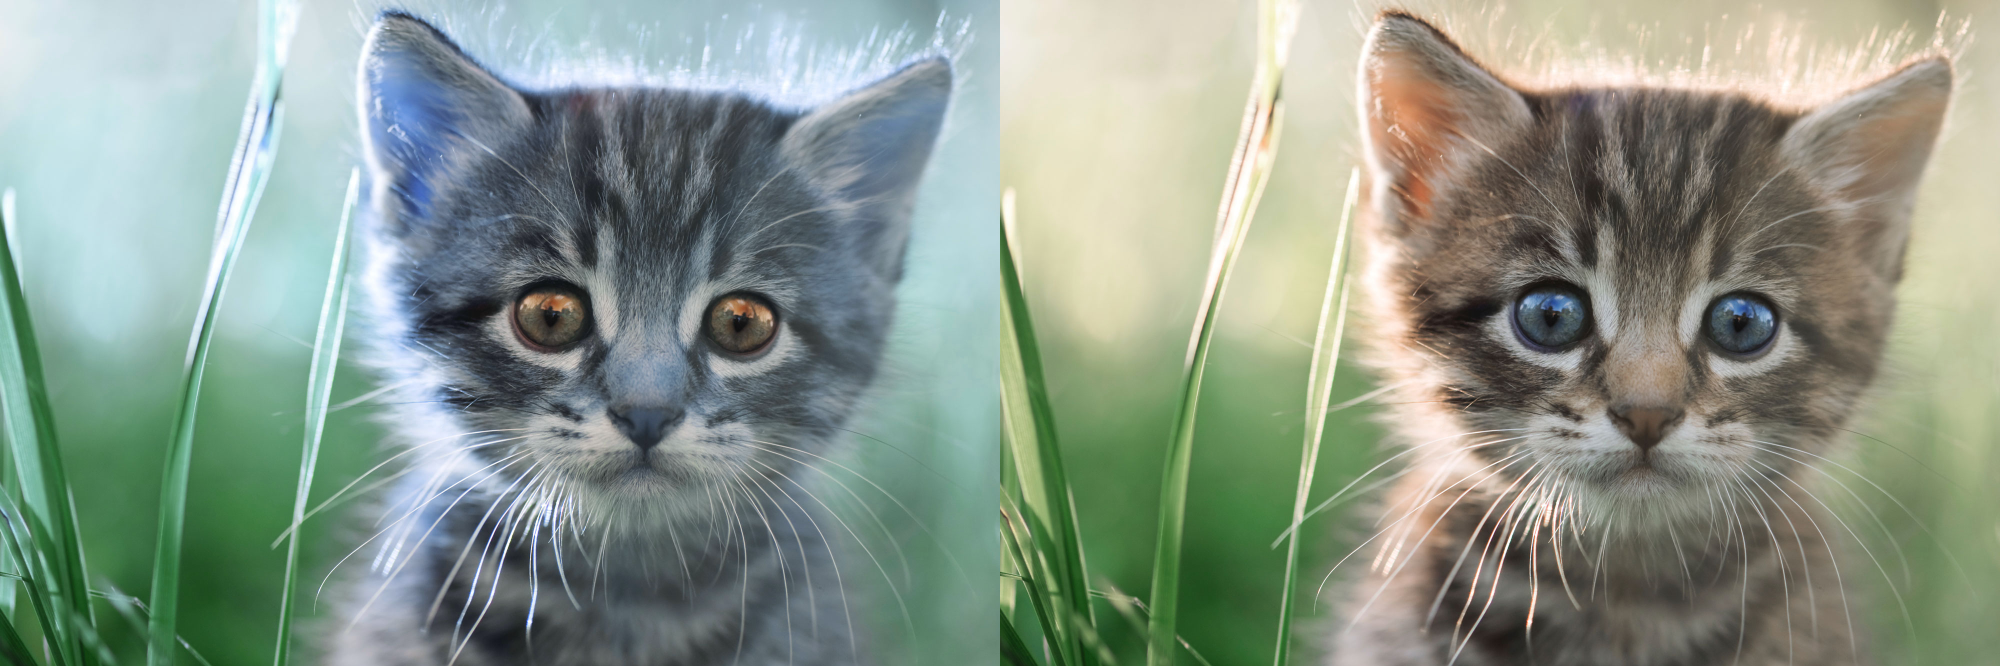

In [13]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://www.petbarn.com.au/petspot/app/uploads/2019/01/kitten-000017380158_Smaller.jpg"]
# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

resolusi image: tinggi x lebar =  666  x  1000


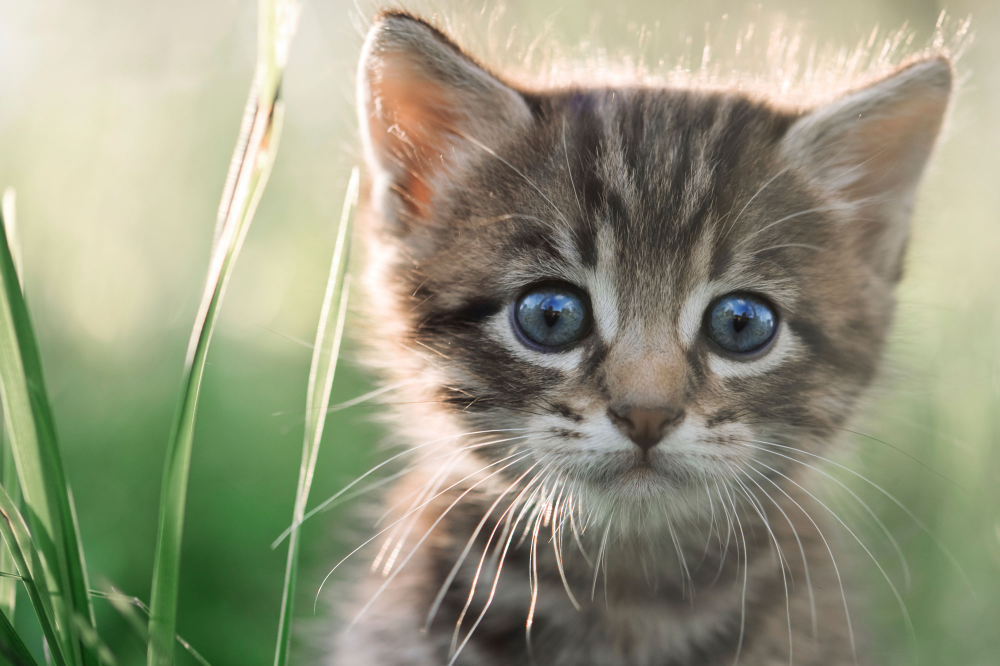

In [14]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
cv2_imshow(image_2)

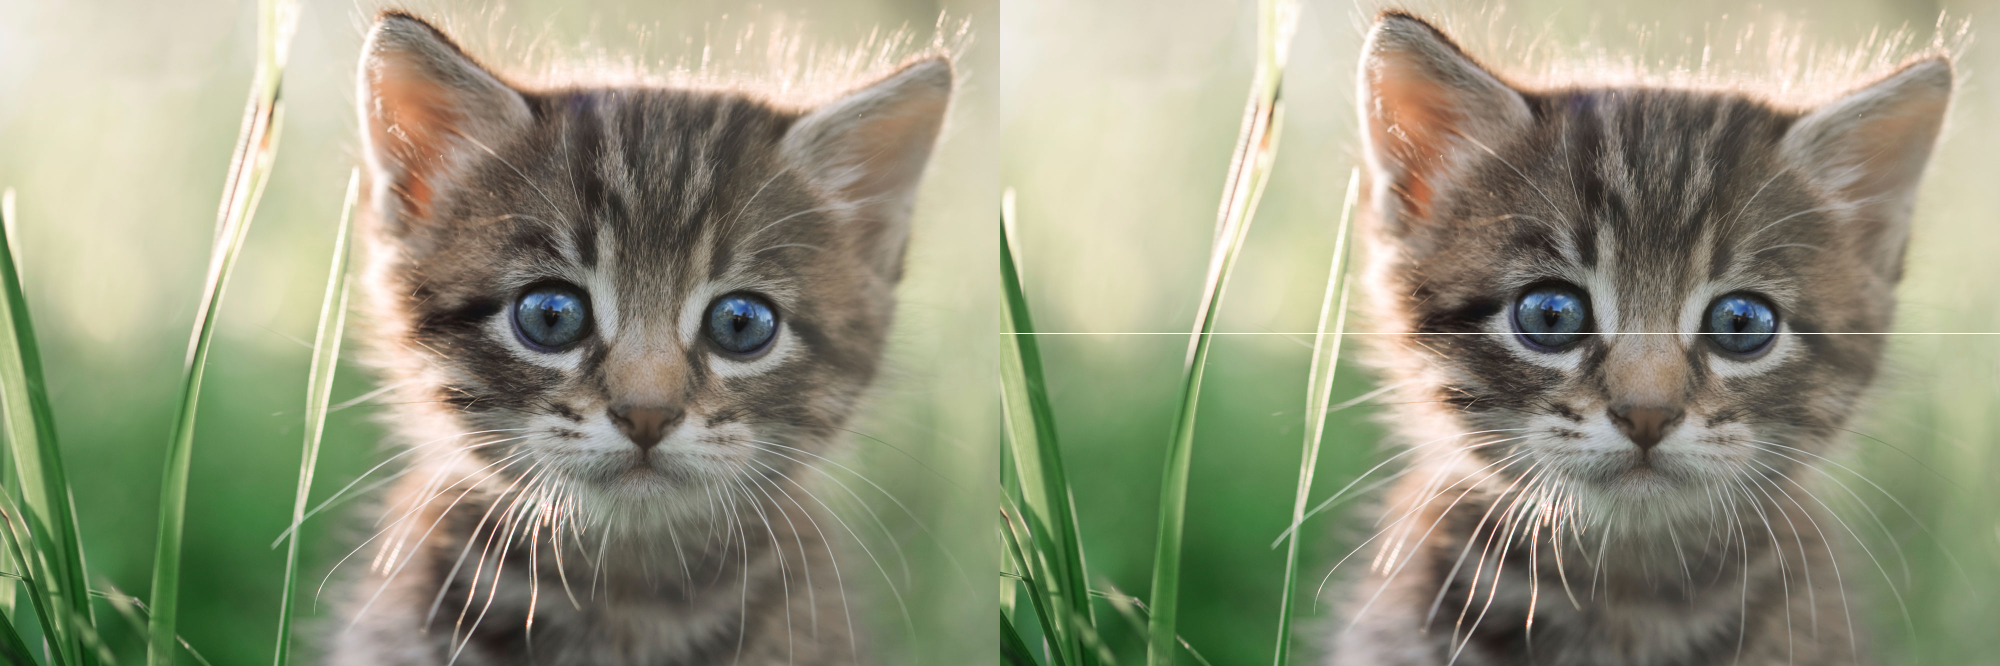

In [15]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# membuat garis horizontal ditengah image
for y in range (lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi

**Pertanyaan**
1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan
menggunakan Google Colab?
2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan?
Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?
3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut :

Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?
4. Perhatikan potongan kode progam berikut :

Apakah kegunaan kode [255,255,255] ? Jelaskan!
5. Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun
rendah!

**Jawaban** :
Tentu, berikut penjelasan singkatnya:

1. **Google Colab** digunakan karena aksesibilitasnya, dukungan hardware (GPU/TPU), kemudahan kolaborasi, dan banyaknya library yang sudah tersedia tanpa instalasi tambahan.

2. **Library di langkah ke-8** digunakan untuk berbagai fungsi pengolahan citra seperti membaca, menulis, dan memanipulasi gambar (misalnya OpenCV untuk pengolahan gambar dan NumPy untuk operasi numerik). Tidak semua library wajib digunakan, tergantung tugas yang diberikan.

3. **Kode di langkah ke-9** biasanya digunakan untuk operasi pengolahan citra seperti filtering atau thresholding. Tanpa kode ini, hasil pengolahan citra mungkin tidak sesuai dengan yang diharapkan, misalnya masih terdapat noise.

4. **Kode `[255,255,255]`** merepresentasikan warna putih dalam format RGB. Digunakan untuk menentukan warna atau intensitas tertentu dalam operasi seperti thresholding atau masking.

5. **Pixel dan resolusi gambar:** Pixel adalah unit terkecil gambar digital, sedangkan resolusi menentukan jumlah pixel dalam gambar. Resolusi tinggi berarti lebih banyak detail dan gambar lebih tajam; resolusi rendah berarti detail lebih sedikit dan gambar mungkin terlihat buram.

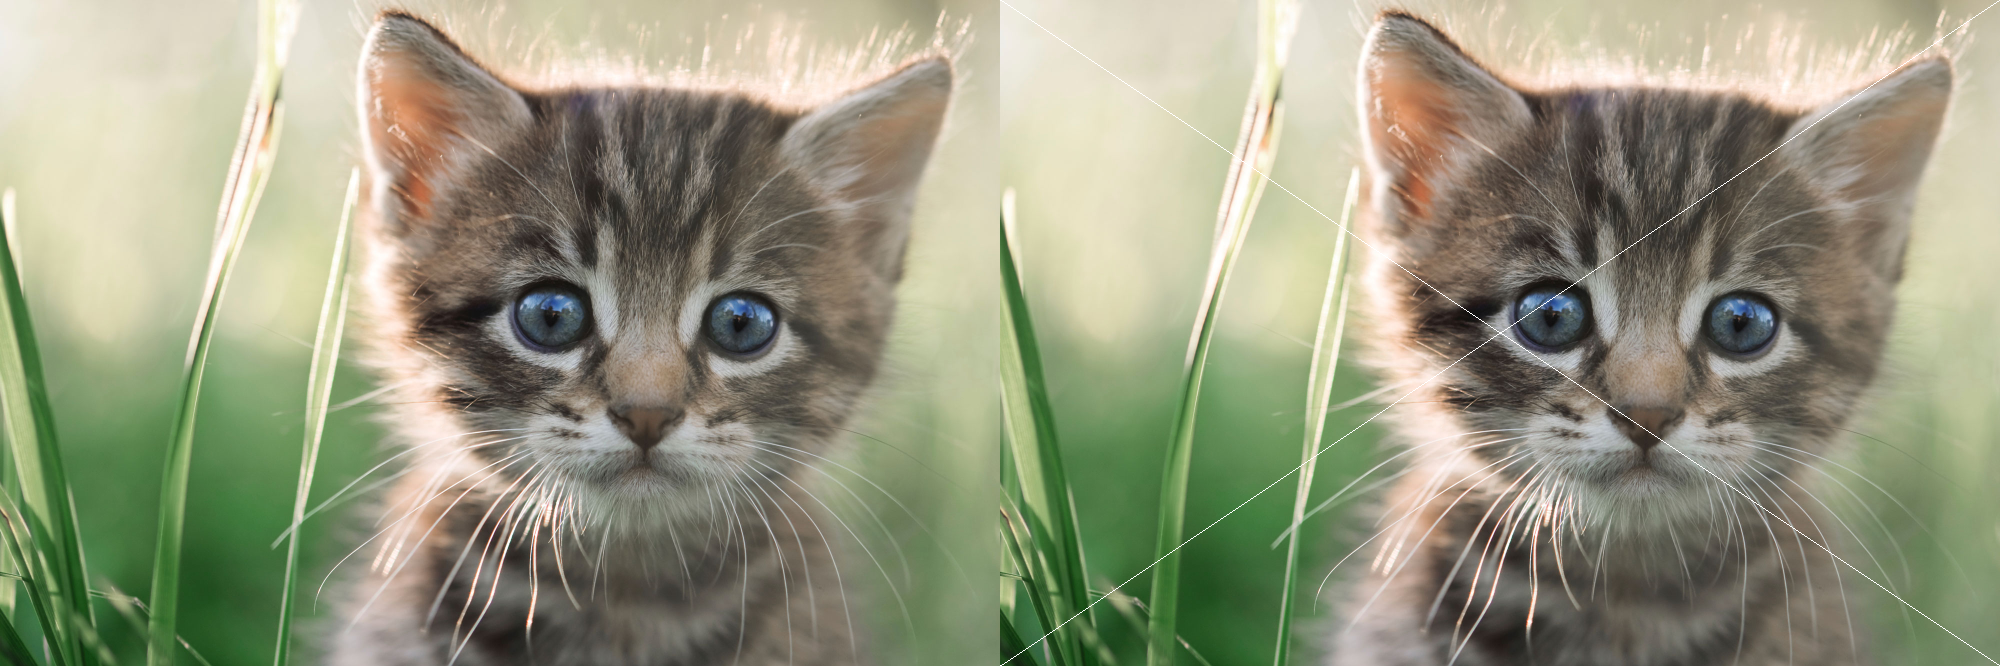

In [47]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Mengonversi gambar ke format RGB
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Membuat garis Diagonal
# Mendapatkan ukuran gambar
tinggi, lebar, _ = image.shape

# Membuat garis diagonal dari kiri atas ke kanan bawah
for i in range(lebar):
    y = int((i * tinggi) / lebar)  # Menyesuaikan y agar sesuai dengan proporsi gambar
    image_3[y, i] = [255, 255, 255]

# Membuat garis diagonal dari kiri bawah ke kanan atas
for i in range(lebar):
    y = tinggi - 1 - int((i * tinggi) / lebar)  # Menyesuaikan y agar sesuai dengan proporsi gambar
    image_3[y, i] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

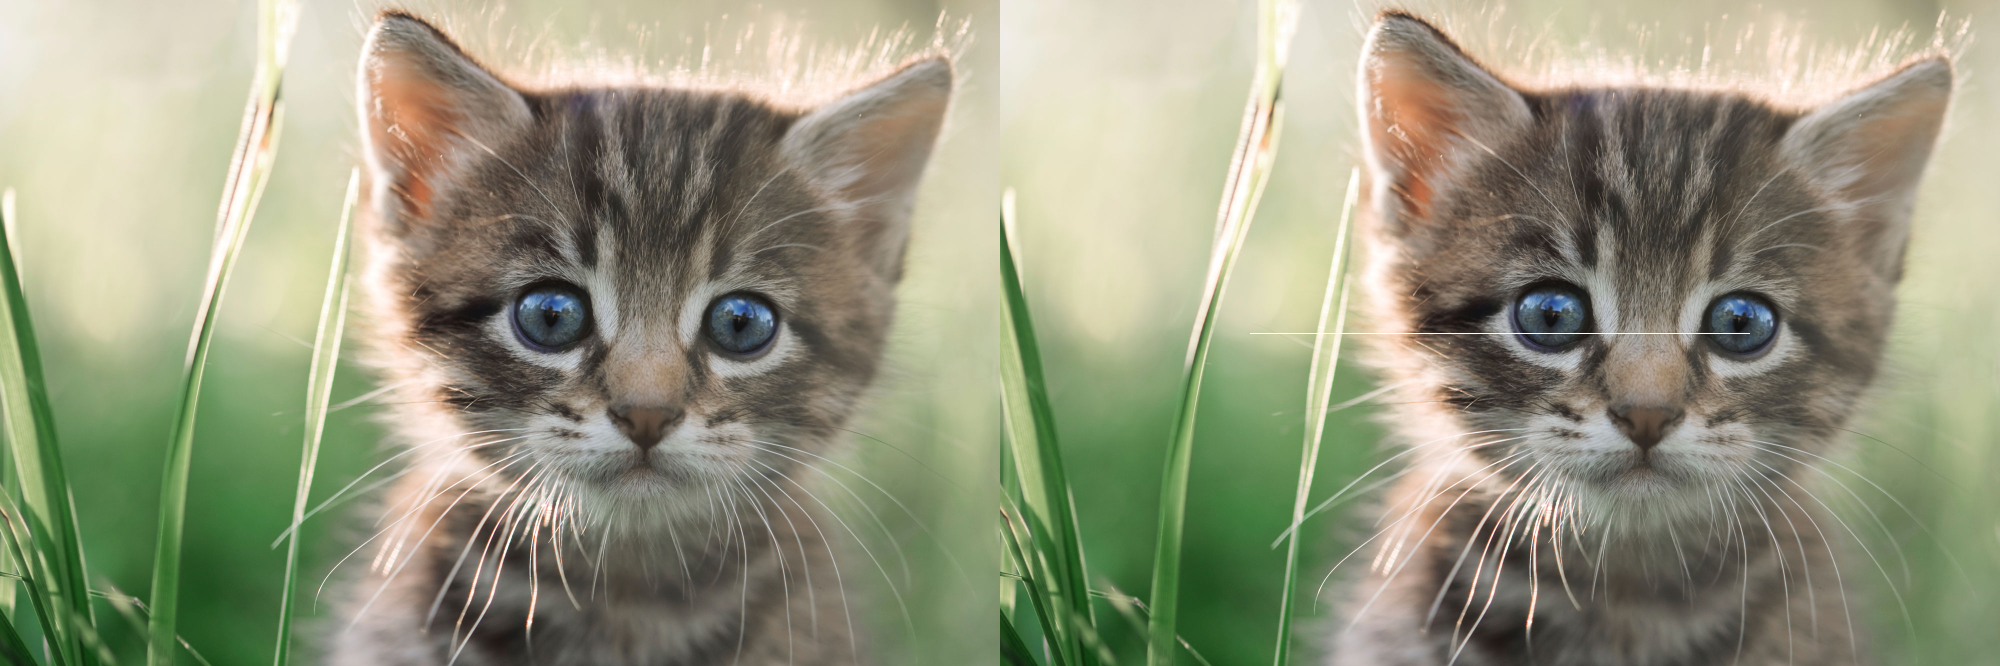

In [38]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Misalkan 'image' adalah gambar asli yang sudah dimuat sebelumnya.
# Ubah ke format RGB
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tinggi, lebar, _ = image_3.shape

# Buat garis horizontal di tengah dengan panjang 10 pixel
panjang_garis = 500
awal = (lebar - panjang_garis) // 2  # Titik awal garis (tengah gambar)
akhir = awal + panjang_garis  # Titik akhir garis

# Gambar garis horizontal putih
for y in range(awal, akhir):
    image_3[int(tinggi/2), y] = [255, 255, 255]  # Ganti pixel menjadi putih

# Menggabungkan gambar sebelum dan sesudah digaris
final_frame = cv.hconcat((image_2, image_3))

# Menampilkan gambar akhir
cv2_imshow(final_frame)


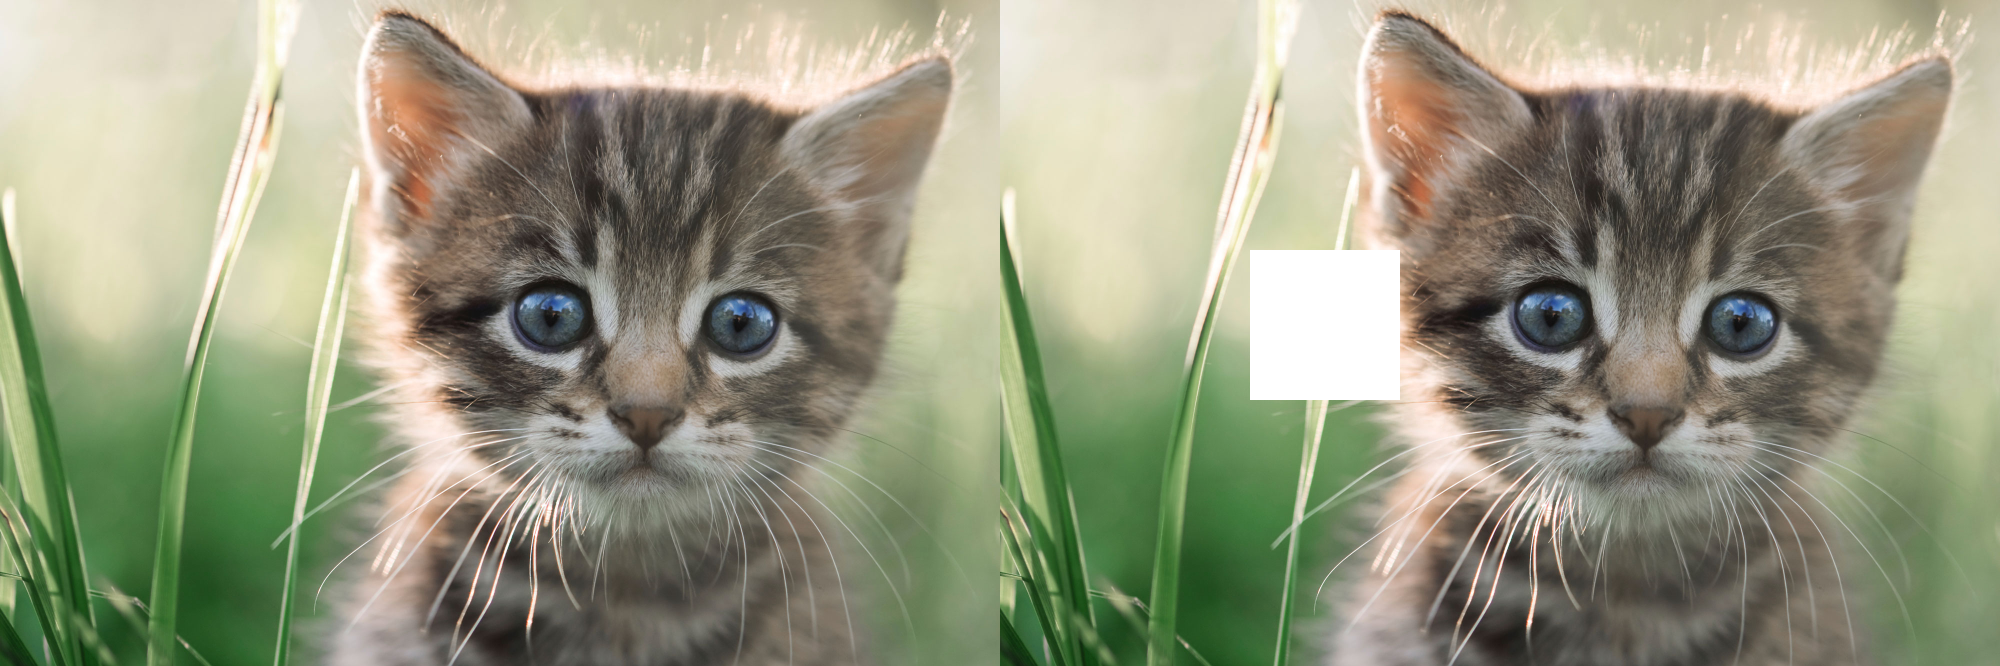

In [46]:
import cv2 as cv

# Asumsikan image sudah dimuat sebelumnya
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Ukuran dan posisi kotak
x_start, y_start = 250, 250  # Posisi awal (kiri atas) kotak
kotak_lebar, kotak_tinggi = 150, 150  # Lebar dan tinggi kotak

# Membuat kotak di area yang ditentukan
for x in range(x_start, x_start + kotak_lebar):
    for y in range(y_start, y_start + kotak_tinggi):
        image_3[y, x] = [255, 255, 255]

# Menggabungkan gambar sebelum dan sesudah digaris
final_frame = cv.hconcat((image_2, image_3))

# Menampilkan gambar akhir
cv2_imshow(final_frame)
